In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
df = pd.read_csv("newly_truncated_value2.csv")

df.head()

,0,1,2,3,4,5,6,7
0,0.0,0.5,2.179346e-30,9.554672e-30,0.0,0.99997,0.99993,1.00000
1,0.0,0.0,9.554672e-30,9.200899e-30,1.0,0.99993,0.99997,1.00000
2,0.0,0.0,7.981269e-30,9.554672e-30,0.0,0.99994,0.99993,1.00000
3,0.0,0.0,9.554672e-30,9.200899e-30,1.0,0.99993,0.99997,1.00000
4,0.0,0.0,5.671957e-30,9.554672e-30,0.0,0.99993,0.99993,0.99999


In [28]:
X = np.array(df.drop(['5','6','7'],1))
y = np.array(df['7'])
y = y.astype("int")

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
#Applying Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/home/seema/major/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [33]:
#Fitting Logistic Regression to the Training set
classifier =LinearDiscriminantAnalysis()
classifier.fit(X_train, y_train)
 


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[323 110]
 [288 149]]


In [36]:
LinearDiscriminantAnalysis(y_test,y_pred)

LinearDiscriminantAnalysis(n_components=None, priors=None,
              shrinkage=array([0, 1, ..., 0, 1]),
              solver=array([0, 1, ..., 1, 1]), store_covariance=False,
              tol=0.0001)

In [37]:

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,323,110,433
1,288,149,437
All,611,259,870


In [38]:
#import classification_report
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.53      0.75      0.62       433
          1       0.58      0.34      0.43       437

avg / total       0.55      0.54      0.52       870



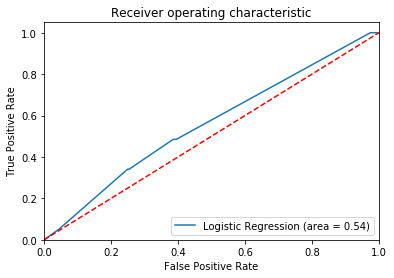

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [42]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.54345976397968521